<a href="https://colab.research.google.com/github/tiagopessoalima/ED2/blob/main/Aula_Semana_04_(ED2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Listas Simplesmente Ligadas (Encadeadas)**

São estruturas de dados **lineares** e **dinâmicas** utilizadas para armazenar coleções de elementos. Diferentemente dos *arrays* (ou listas padrão do Python), que armazenam os elementos em posições **contíguas de memória**, as listas ligadas mantêm os dados dispersos na memória, conectados entre si por **referências**. Cada elemento da lista, chamado de **nó** (*node*), possui dois componentes principais:

1. **Valor** armazenado (dado propriamente dito);  
2. **Referência (ou ponteiro)** para o próximo nó da sequência.

Essa organização oferece vantagens importantes, como inserções e remoções mais eficientes — principalmente quando comparadas aos *arrays*, onde a realocação ou movimentação de elementos pode ser custosa em termos de desempenho. Por outro lado, como cada nó precisa armazenar uma referência, as listas ligadas geralmente consomem mais memória do que *arrays*.

## **O Bloco de Construção: O Nó (Node)**


A estrutura fundamental de uma lista ligada é composta por nós, que são unidades responsáveis por armazenar os dados e manter a ligação entre os elementos da lista. A seguir, a definição da classe que representa um nó em uma lista simplesmente ligada:

In [66]:
class No:
    """
    Representa um único nó em uma lista simplesmente encadeada.
    """
    def __init__(self, valor):
        """
        Inicializa um novo nó.

        Parâmetros:
            valor: Dado a ser armazenado no nó.
        """
        self.valor = valor        # Valor armazenado no nó
        self.proximo = None       # Referência para o próximo nó (inicialmente nula)

    def __repr__(self):
        """
        Representação textual do nó.
        """
        return f"No({self.valor})"

> A variável `self.proximo` é o que permite o **encadeamento dos nós**. A partir de um nó, é possível navegar sequencialmente pela lista seguindo essa referência — até que ela aponte para `None`, indicando o fim da estrutura.

### **Exemplo de Criação e Encadeamento de Nós**

Abaixo, criamos três nós manualmente e fazemos o encadeamento entre eles, simulando uma lista simples com três elementos.


In [67]:
# Criando três nós
n1 = No("A")
n2 = No("B")
n3 = No("C")

# Encadeando manualmente
n1.proximo = n2
n2.proximo = n3

### **Imprimindo os Nós Individualmente**


In [68]:
print(n1)                  # No(A)
print(n1.proximo)          # No(B)
print(n1.proximo.proximo)  # No(C)
print(n1.proximo.proximo.proximo)  # None (fim da lista)

No(A)
No(B)
No(C)
None


> A navegação continua até que a referência aponte para `None`, o que indica que atingimos o final da lista.


## **Visualização Conceitual**

Abaixo, temos uma representação esquemática da estrutura construída com os três nós. Cada nó contém um valor e uma referência para o próximo nó da sequência. Esse encadeamento é o que permite que a lista seja percorrida dinamicamente, sem a necessidade de elementos estarem em posições contíguas na memória.

```
n1        n2        n3
┌──────┐  ┌──────┐  ┌──────┐
│ "A"  │→ │ "B"  │→ │ "C"  │→ None
└──────┘  └──────┘  └──────┘
```

Cada seta (→) representa a ligação entre os nós, estabelecida pelo atributo `.proximo`. O último nó da lista aponta para `None`, indicando o término da estrutura. Esse modelo permite que operações como inserção e remoção de elementos possam ser realizadas com complexidade reduzida, especialmente no início da lista ou em posições intermediárias, sem a necessidade de deslocamento de dados na memória — ao contrário do que ocorre em *arrays* tradicionais.






## **Classe Lista Ligada**

Após estabelecermos a estrutura fundamental de um nó, avançamos agora para a implementação de uma estrutura de dados abstrata que representa uma lista simplesmente encadeada.Essa estrutura é essencial em contextos onde há necessidade de operações dinâmicas e eficientes de inserção e remoção, principalmente quando não se conhece previamente o número de elementos a serem armazenados ou quando os dados sofrem alterações frequentes durante a execução do programa.

### **Integração com a Sintaxe do Python**

A classe é projetada com princípios de encapsulamento e modularidade, utilizando métodos especiais do Python para integrar-se naturalmente com a sintaxe da linguagem. Isso permite, por exemplo:

- Usar `len(lista)` para consultar o número de elementos (via __len__);
- Iterar com for `item in lista` (via __iter__);
- Acessar elementos com `lista[i]` (via __getitem__);
- Verificar presença com `valor in lista` (via __contains__);
- Exibir representações legíveis e técnicas (__str__ e __repr__).

### **Implementação**

A seguir, apresentamos a implementação completa da classe `ListaLigada`, com suporte para inserção de elementos tanto no início quanto no final da lista, e com todos os métodos auxiliares para inspeção, iteração e indexação:

In [69]:
class ListaLigada:
    """
    Implementa uma lista simplesmente encadeada.
    """

    def __init__(self):
        """
        Inicializa a lista como vazia.
        """
        self.inicio = None
        self._tamanho = 0

    def limpar(self) -> None:
        """
        Remove todos os elementos da lista.
        """
        self.inicio = None
        self._tamanho = 0

    def esta_vazia(self) -> bool:
        """
        Verifica se a lista está vazia.
        """
        return self._tamanho == 0

    def no_em(self, posicao: int) -> No:
        """
        Retorna o nó da posição especificada.
        """
        if not 0 <= posicao < self._tamanho:
            raise IndexError("Índice fora do intervalo.")

        atual = self.inicio
        for _ in range(posicao):
            atual = atual.proximo
        return atual

    def inserir_no_inicio(self, valor: any) -> None:
        """
        Insere um novo elemento no início da lista.
        """
        novo_no = No(valor)
        novo_no.proximo = self.inicio
        self.inicio = novo_no
        self._tamanho += 1

    def inserir_no_final(self, valor: any) -> None:
        """
        Insere um novo elemento no final da lista.
        """
        novo_no = No(valor)
        if self.esta_vazia():
            self.inicio = novo_no
        else:
            ultimo = self.no_em(self._tamanho - 1)
            ultimo.proximo = novo_no
        self._tamanho += 1

    def inserir_em(self, posicao: int, valor: any) -> None:
        """
        Insere um novo elemento em uma posição específica da lista.
        """
        if not 0 <= posicao <= self._tamanho:
            raise IndexError("Índice fora do intervalo.")

        if posicao == 0:
            self.inserir_no_inicio(valor)
        else:
            anterior = self.no_em(posicao - 1)
            novo_no = No(valor)
            novo_no.proximo = anterior.proximo
            anterior.proximo = novo_no
            self._tamanho += 1

    def remover_do_inicio(self) -> any:
        """
        Remove e retorna o primeiro elemento da lista.
        """
        if self.esta_vazia():
            raise IndexError("A lista está vazia.")

        removido = self.inicio
        self.inicio = removido.proximo
        self._tamanho -= 1
        return removido.valor

    def remover_do_final(self) -> any:
        """
        Remove e retorna o último elemento da lista.
        """
        if self.esta_vazia():
            raise IndexError("A lista está vazia.")

        if self._tamanho == 1:
            return self.remover_do_inicio()

        anterior = self.no_em(self._tamanho - 2)
        valor = anterior.proximo.valor
        anterior.proximo = None
        self._tamanho -= 1
        return valor

    def remover_em(self, posicao: int) -> any:
        """
        Remove e retorna o elemento da posição especificada.
        """
        if not 0 <= posicao < self._tamanho:
            raise IndexError("Índice fora do intervalo.")

        if posicao == 0:
            return self.remover_do_inicio()

        anterior = self.no_em(posicao - 1)
        removido = anterior.proximo
        anterior.proximo = removido.proximo
        self._tamanho -= 1
        return removido.valor

    def posicao_de(self, valor: any) -> int:
        """
        Retorna o índice da primeira ocorrência do valor na lista, ou -1 se não encontrado.
        """
        atual = self.inicio
        pos = 0
        while atual:
            if atual.valor == valor:
                return pos
            atual = atual.proximo
            pos += 1
        return -1

    def __contains__(self, valor: any) -> bool:
        """
        Permite o uso de 'valor in lista'.
        """
        return self.posicao_de(valor) != -1

    def __len__(self) -> int:
        """
        Retorna o número de elementos da lista.
        """
        return self._tamanho

    def __getitem__(self, posicao: int) -> any:
        """
        Permite acessar o valor de um elemento usando colchetes (ex: lista[2]).
        """
        return self.no_em(posicao).valor

    def __iter__(self):
        """
        Permite iterar sobre os elementos da lista.
        """
        atual = self.inicio
        while atual:
            yield atual.valor
            atual = atual.proximo

    def __str__(self) -> str:
        """
        Retorna uma representação amigável da lista.
        """
        return " -> ".join(str(valor) for valor in self) + " -> None"

    def __repr__(self) -> str:
        """
        Retorna uma representação técnica da lista.
        """
        return f"ListaLigada(tamanho={self._tamanho})"


#### **Análise de Complexidade**

A classe `ListaLigada` implementa uma lista simplesmente encadeada com operações fundamentais como inserção, remoção, busca e iteração. Cada método tem uma complexidade associada ao seu custo computacional, dependendo do tamanho da lista ($n$). Abaixo, apresentamos uma tabela com as principais operações e suas respectivas complexidades.

| Método               | Finalidade                                        | Complexidade |
|----------------------|--------------------------------------------------|--------------|
| `__init__`           | Inicialização da estrutura                       | O(1)         |
| `esta_vazia`         | Verifica se a lista está vazia                   | O(1)         |
| `inserir_no_inicio`  | Inserção de elemento no início                   | O(1)         |
| `inserir_no_final`   | Inserção de elemento no final                    | O(n)         |
| `remover_do_inicio`  | Remoção do primeiro elemento                     | O(1)         |
| `remover_do_final`   | Remoção do último elemento                       | O(n)         |
| `__contains__`       | Verificação de existência (`valor in lista`)     | O(n)         |
| `__len__`            | Retorna o número de elementos                    | O(1)         |
| `__getitem__`        | Acesso por índice (`lista[i]`)                   | O(n)         |
| `__iter__`           | Permite iteração com `for item in lista`         | O(n)         |
| `__str__`            | Representação legível (visual) da lista          | O(n)         |
| `__repr__`           | Representação técnica da lista                   | O(1)         |

#### **Exemplos de Uso**

A seguir, demonstramos como utilizar os principais métodos da classe `ListaLigada`:

##### **Criando uma Lista Encadeada**


In [70]:
lista = ListaLigada()

##### **Verificando se a Lista Está Vazia**

In [71]:
print(lista.esta_vazia())
# Saída: True

True


##### **Inserindo Elementos no Início**

In [72]:
lista.inserir_no_inicio("C")  # Lista: C
lista.inserir_no_inicio("B")  # Lista: B -> C
lista.inserir_no_inicio("A")  # Lista: A -> B -> C

##### **Inserindo Elementos no Final**

In [73]:
lista.inserir_no_final("D")   # Lista: A -> B -> C -> D
lista.inserir_no_final("E")   # Lista: A -> B -> C -> D -> E

##### **Exibindo a Lista**

In [74]:
print(lista)
# Saída: A -> B -> C -> D -> E -> None

A -> B -> C -> D -> E -> None


##### **Tamanho da Lista**

In [75]:
print(len(lista))
# Saída: 5

5


##### **Acessando Elemento pelo Índice**

In [76]:
print(lista[2])
# Saída: C

C


##### **Iterando Sobre os Elementos**


In [77]:
for valor in lista:
    print(valor, end=" | ")
# Saída: A | B | C | D | E |

A | B | C | D | E | 

##### **Verificando se um Elemento Está na Lista (Usando `in`)**


In [78]:
print("C" in lista)
# Saída: True

print("Z" in lista)
# Saída: False

True
False


## **Exercícios**

Testando inserção de 10 elementos (média de 30 execuções)...
  Lista Ligada: 0.000007s | List (Python): 0.000002s
Testando inserção de 100 elementos (média de 30 execuções)...
  Lista Ligada: 0.000051s | List (Python): 0.000012s
Testando inserção de 1000 elementos (média de 30 execuções)...
  Lista Ligada: 0.000545s | List (Python): 0.000180s
Testando inserção de 10000 elementos (média de 30 execuções)...
  Lista Ligada: 0.011685s | List (Python): 0.015094s
Testando inserção de 100000 elementos (média de 30 execuções)...
  Lista Ligada: 0.137270s | List (Python): 1.578841s


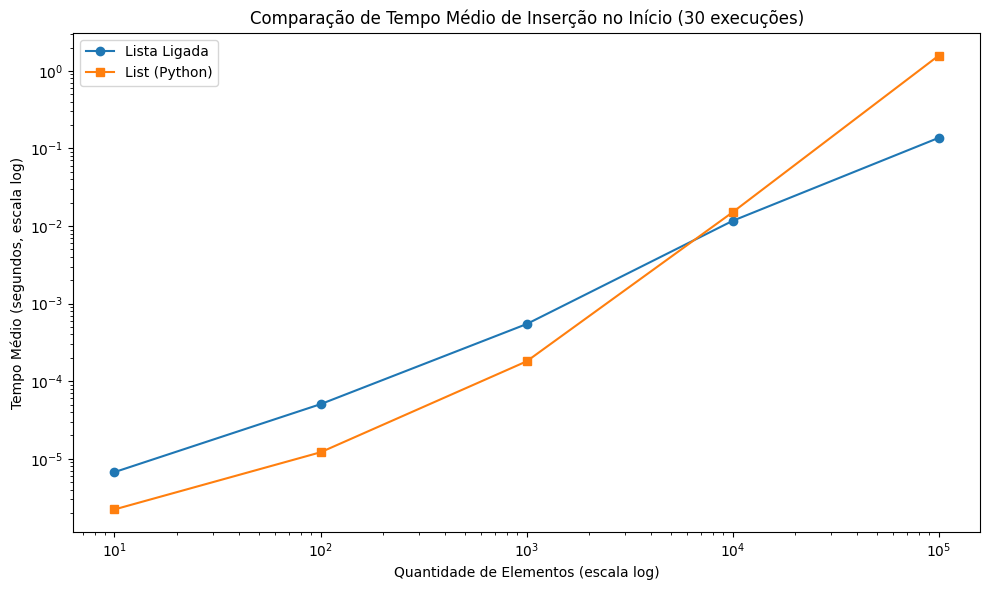

In [79]:
import time
import matplotlib.pyplot as plt

# ---------- Função Genérica para Testes com Média de Execuções ----------

def calcular_tempo_medio(func, qtd, execucoes=30):
    tempos = []
    for _ in range(execucoes):
        inicio = time.perf_counter()
        func(qtd)
        fim = time.perf_counter()
        tempos.append(fim - inicio)
    return sum(tempos) / execucoes

# ---------- Testes Específicos para Cada Estrutura ----------

def teste_lista_ligada(qtd):
    lista = ListaLigada()
    for i in range(qtd):
        lista.inserir_no_inicio(i)

def teste_lista_python(qtd):
    vetor = []
    for i in range(qtd):
        vetor.insert(0, i)  # Inserção no início de lista Python (ineficiente)

# ---------- Execução dos Testes ----------

tamanhos = [10**i for i in range(1, 6)]
tempos_ligada = []
tempos_python = []

for tamanho in tamanhos:
    print(f"Testando inserção de {tamanho} elementos (média de 30 execuções)...")

    tempo_ll = calcular_tempo_medio(teste_lista_ligada, tamanho)
    tempo_py = calcular_tempo_medio(teste_lista_python, tamanho)

    print(f"  Lista Ligada: {tempo_ll:.6f}s | List (Python): {tempo_py:.6f}s")

    tempos_ligada.append(tempo_ll)
    tempos_python.append(tempo_py)

# ---------- Gráfico ----------

plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos_ligada, label='Lista Ligada', marker='o')
plt.plot(tamanhos, tempos_python, label='List (Python)', marker='s')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Quantidade de Elementos (escala log)')
plt.ylabel('Tempo Médio (segundos, escala log)')
plt.title('Comparação de Tempo Médio de Inserção no Início (30 execuções)')
plt.legend()
plt.tight_layout()
plt.show()
